POSTTEST 5

In [17]:
# Import libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

import tensorflow as tf: Mengimpor TensorFlow, sebuah library untuk membangun dan melatih model machine learning dan deep learning.
import tensorflow_datasets as tfds: Mengimpor TensorFlow Datasets, sebuah library yang menyediakan dataset siap pakai untuk machine learning, termasuk memuat dan memproses dataset.
import matplotlib.pyplot as plt: Mengimpor Matplotlib, khususnya submodul pyplot, yang digunakan untuk membuat grafik dan visualisasi data, seperti menampilkan gambar dari dataset.

In [30]:
# Menampilkan informasi label dari dataset
print(ds_info.features['label'].names)

['angular_leaf_spot', 'bean_rust', 'healthy']


untuk menampilkan label apa saja yang ada pada dataset

In [18]:
# Memuat dataset Beans
(ds_train, ds_test), ds_info = tfds.load(
    'beans',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Menampilkan informasi dataset
print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.VUNL12_0.1.0/beans-train.tfrecord*...:   0%|          | 0…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.VUNL12_0.1.0/beans-validation.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.VUNL12_0.1.0/beans-test.tfrecord*...:   0%|          | 0/…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated by
    experts from the National Crops Resources Research Institute (NaCRRI) in Uganda
    and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_dir=PosixGPath('/tmp/tmppmz0r8tztfds'),
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable

tfds.load():

Memuat dataset Beans, dataset yang berisi gambar daun kacang untuk klasifikasi tiga jenis penyakit.
split=['train[:80%]', 'train[80%:]']: Membagi dataset train menjadi 80% untuk pelatihan (ds_train) dan 20% untuk pengujian/validasi (ds_test).
as_supervised=True: Dataset dimuat dalam bentuk pasangan (input, label), di mana input adalah gambar dan label adalah kelas.
with_info=True: Memuat metadata tambahan tentang dataset (informasi seperti jumlah sampel, fitur, dsb).
print(ds_info):

Menampilkan informasi tentang dataset, seperti jumlah contoh, deskripsi fitur, label, dan pembagian data.

In [19]:
def preprocess(image, label):
    image = tf.image.resize(image, [100, 100])  # Ubah ukuran gambar
    image /= 255.0  # Normalisasi gambar
    return image, label

# Terapkan preprocessing
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

'beans': Dataset Beans dari TensorFlow Datasets.
split=['train[:80%]', 'train[80%:]']: Dataset dibagi menjadi dua bagian, 80% untuk training (ds_train) dan 20% untuk testing (ds_test).
as_supervised=True: Data dimuat dalam format (input, label) yang siap untuk supervised learning.
with_info=True: Mengembalikan objek ds_info yang berisi informasi tentang dataset, seperti jumlah sampel, label, dan deskripsi fitur.

print(ds_info)
Menampilkan informasi tentang dataset, termasuk label, jumlah data, dan detail lainnya yang berkaitan dengan dataset Beans.

In [20]:
# Membangun model Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 kelas untuk jenis kacang
])

# Menampilkan ringkasan model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353,475 (16.61 MB)

 Trainable params: 4,353,475 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

tf.keras.Sequential(): Membuat model secara berurutan, lapis demi lapis.

Lapisan-lapisan Model:

Conv2D(32, (3, 3), activation='relu'): Lapisan konvolusi dengan 32 filter, ukuran kernel (3x3), dan fungsi aktivasi ReLU untuk menangkap fitur dari gambar input.
MaxPooling2D(pool_size=(2, 2)): Lapisan pooling untuk mengurangi dimensi fitur dengan mengambil nilai maksimum dari area (2x2).
Conv2D(64, (3, 3), activation='relu'): Lapisan konvolusi kedua dengan 64 filter dan fungsi aktivasi ReLU.
MaxPooling2D(pool_size=(2, 2)): Lapisan pooling kedua untuk lebih mengurangi dimensi fitur.
Flatten(): Mengubah data 2D menjadi 1D agar dapat dihubungkan ke lapisan dense.
Dense(128, activation='relu'): Lapisan dense dengan 128 neuron dan aktivasi ReLU.
Dense(3, activation='softmax'): Lapisan keluaran dengan 3 neuron (untuk 3 kelas kacang) dan aktivasi softmax untuk klasifikasi multi-kelas.
model.summary(): Menampilkan ringkasan arsitektur model, termasuk jumlah parameter dan bentuk tiap lapisan.

In [21]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.compile(): Mempersiapkan model untuk pelatihan.
optimizer='adam': Menggunakan algoritma optimasi Adam.
loss='sparse_categorical_crossentropy': Fungsi loss untuk klasifikasi multi-kelas dengan label integer.
metrics=['accuracy']: Mengukur akurasi model selama pelatihan dan evaluasi.

In [22]:
# Melatih model
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 741ms/step - accuracy: 0.3485 - loss: 1.7336 - val_accuracy: 0.5411 - val_loss: 0.9978
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 577ms/step - accuracy: 0.5462 - loss: 0.9473 - val_accuracy: 0.6184 - val_loss: 0.8232
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 551ms/step - accuracy: 0.6426 - loss: 0.7917 - val_accuracy: 0.6715 - val_loss: 0.7099
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 566ms/step - accuracy: 0.7043 - loss: 0.6879 - val_accuracy: 0.6908 - val_loss: 0.6458
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 579ms/step - accuracy: 0.7661 - loss: 0.5356 - val_accuracy: 0.7150 - val_loss: 0.6278
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 546ms/step - accuracy: 0.8154 - loss: 0.4735 - val_accuracy: 0.7198 - val_loss: 0.6286
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 553ms/step - accuracy: 0.8707 - loss: 0.3969 - val_accuracy: 0.7053 - val_loss: 0.6318
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 550ms/step - accuracy: 0.8933 - loss: 0.3518 - val_accu

model.fit(): Melatih model menggunakan dataset.
ds_train: Dataset yang digunakan untuk melatih model.
epochs=10: Jumlah iterasi pelatihan penuh sebanyak 10 kali.
validation_data=ds_test: Dataset uji digunakan untuk validasi selama pelatihan.
history: Menyimpan riwayat pelatihan (akurat, loss) untuk analisis lebih lanjut.

In [23]:
# Evaluasi model
loss, accuracy = model.evaluate(ds_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.7047 - loss: 0.7496
Accuracy: 71.50%


model.evaluate(ds_test): Mengevaluasi performa model pada data test (ds_test) untuk menghitung nilai loss dan accuracy. Dataset test digunakan untuk mengukur kemampuan generalisasi model setelah pelatihan.
loss: Nilai kesalahan (error) pada dataset test.
accuracy: Persentase prediksi yang benar dari model pada dataset test.

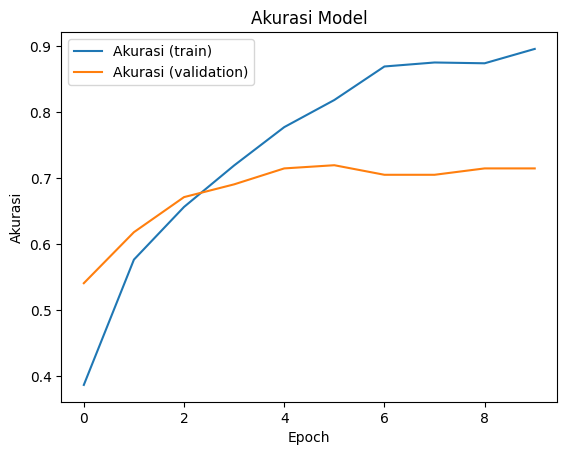

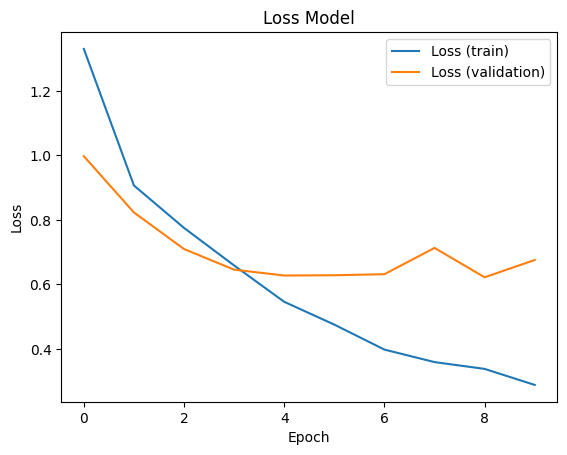

In [24]:
# Visualisasi hasil
plt.plot(history.history['accuracy'], label='Akurasi (train)')
plt.plot(history.history['val_accuracy'], label='Akurasi (validation)')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy']): Menampilkan grafik akurasi pada data train selama setiap epoch.
plt.plot(history.history['val_accuracy']): Menampilkan grafik akurasi pada data validation selama setiap epoch.
Tujuan: Untuk memantau perkembangan akurasi model selama proses pelatihan pada data train dan validation.

plt.plot(history.history['loss']): Menampilkan grafik loss (error) pada data train selama setiap epoch.
plt.plot(history.history['val_loss']): Menampilkan grafik loss pada data validation selama setiap epoch.
Tujuan: Untuk memantau perkembangan nilai loss model selama pelatihan pada data train dan validation.